In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Question 4

**Generating an ARMA(1, 1)**

In [3]:
N = 1000    # number of simulations
x = np.zeros((N, N))
phi = 0.8
theta = 0.7
e_t_1 = np.random.normal(0, 1, (N, N))
for i in range(N - 1):
    x[:, i + 1] = phi * x[:, i] + e_t_1[i + 1] + theta * e_t_1[i]

**Modelling for an AR(1) process**

In [4]:
phi_list = []
error_list = []
# Iterating for every simulation
for i in range(N): 
    # Generating dataframe by shifting the array
    df = pd.DataFrame(data=[x[i, 1:], x[i, :N-1]]).T
    df.columns = ["y", "x"]
    
    # Run the OLS using statsmodels
    X = df["x"]
    Y = df["y"]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    
    # Appending to list of parameters for every simulation
    phi_list.append(results.params.iloc[1])
    
    # Predicting and storing the error
    pred = results.predict(X)
    resids = Y - pred
    error_list.append(resids)

/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Histogram of estimated $\hat{\phi}$**

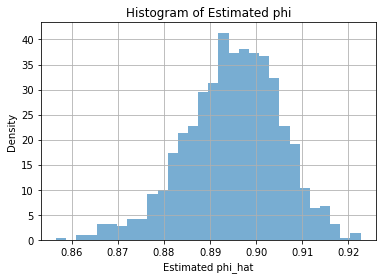

In [5]:
fig = plt.hist(phi_list, 
               bins=30, 
               density=True, 
               alpha=0.6)
plt.title('Histogram of Estimated phi')
plt.xlabel('Estimated phi_hat')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [6]:
print(f"Mean of Estimated Phi = {np.array(phi_list).mean().round(2)}")

Mean of Estimated Phi = 0.89


The OLS estimator seems to follow a normal distribution with a mean of 0.89, approximately 0.9 higher than the actual phi of 0.8. This is primarily due to missing the MA(1) term in the regression expression.

**OLS Errors Autocorrelation**

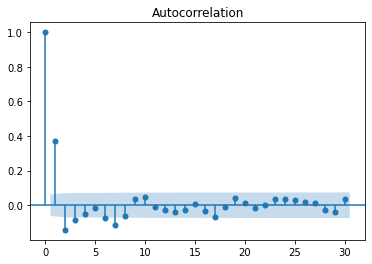

In [7]:
_ = plot_acf(error_list[0])

**OLS Errors Partial Autocorrelation**

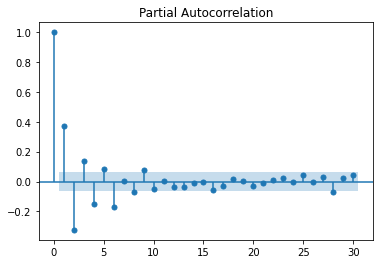

In [8]:
_ = plot_pacf(error_list[0])

# Question 5

**Generating an AR(3) process**

In [9]:
N = 1000    # number of simulations
x = np.zeros((N, N))
lambda_1 = 0.95
lambda_2 = 0.9
lambda_3 = 0.8
for i in range(3, N):
    e_t = np.random.normal(0, 1, N)
    x[:, i] = (lambda_1 + lambda_2 + lambda_3) * x[:, i - 1] - \
              (lambda_1 * lambda_2 + lambda_2 * lambda_3 + lambda_1 * lambda_3) * x[:, i - 2] + \
              (lambda_1 * lambda_2 * lambda_3) * x[:, i - 3] + \
              e_t

**Estimating using an AR(1), AR(2), AR(3), AR(4)**

In [10]:
phi_list_ar1 = []
phi_list_ar2 = []
phi_list_ar3 = []
phi_list_ar4 = []

error_list_ar1 = []
error_list_ar2 = []
error_list_ar3 = []
error_list_ar4 = []

# Iterating for every simulation
for i in range(1000): 
    # Generating dataframe by shifting the array
    df = pd.DataFrame(data=[x[i, 4:], x[i, 3:N-1], x[i, 2:N-2], x[i, 1:N-3], x[i, 0:N-4]]).T.dropna()
    df.columns = ["y", "x1", "x2", "x3", "x4"]
    
    # Run the OLS using statsmodels
    X1 = df[["x1"]]
    X2 = df[["x1", "x2"]]
    X3 = df[["x1", "x2", "x3"]]
    X4 = df[["x1", "x2", "x3", "x4"]]
    Y = df["y"]
    
    X1 = sm.add_constant(X1)
    X2 = sm.add_constant(X2)
    X3 = sm.add_constant(X3)
    X4 = sm.add_constant(X4)
    
    model_ar1 = sm.OLS(Y,X1)
    model_ar2 = sm.OLS(Y,X2)
    model_ar3 = sm.OLS(Y,X3)
    model_ar4 = sm.OLS(Y,X4)

    results_ar1 = model_ar1.fit()
    results_ar2 = model_ar2.fit()
    results_ar3 = model_ar3.fit()
    results_ar4 = model_ar4.fit()

    
    # Appending to list of parameters for every simulation
    phi_list_ar1.append(results_ar1.params.iloc[1])
    phi_list_ar2.append(results_ar2.params.iloc[1])
    phi_list_ar3.append(results_ar3.params.iloc[1])
    phi_list_ar4.append(results_ar4.params.iloc[1])

    
    # Predicting and storing the error
    error_list_ar1.append(Y - results_ar1.predict(X1))
    error_list_ar2.append(Y - results_ar2.predict(X2))
    error_list_ar3.append(Y - results_ar3.predict(X3))
    error_list_ar4.append(Y - results_ar4.predict(X4))

/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Histogram of estimated $\hat{\phi}$, errors ACF and PACF : AR(1)**

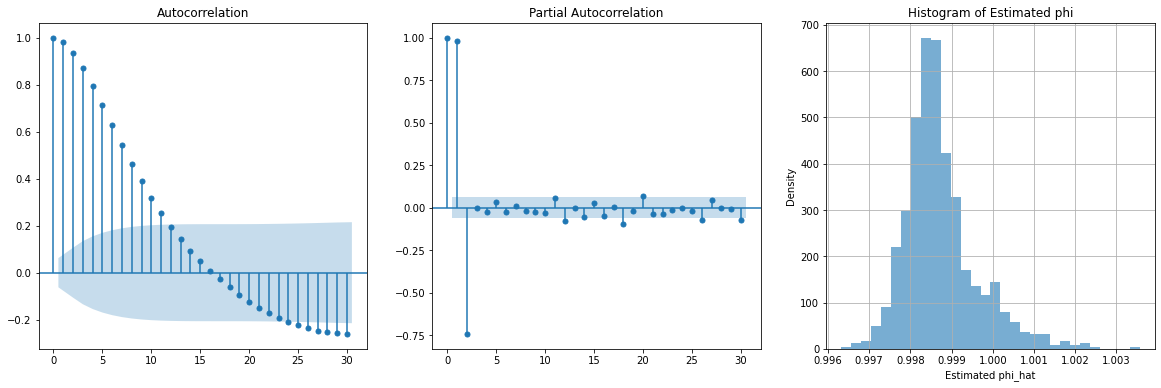

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

_acf = plot_acf(error_list_ar1[0], ax=ax[0])
_pacf = plot_pacf(error_list_ar1[0], ax=ax[1])

ax[2].hist(phi_list_ar1, 
           bins=30, 
           density=True, 
           alpha=0.6)
plt.title('Histogram of Estimated phi')
plt.xlabel('Estimated phi_hat')
plt.ylabel('Density')
plt.grid(True)

**Histogram of estimated $\hat{\phi}$, errors ACF and PACF : AR(2)**


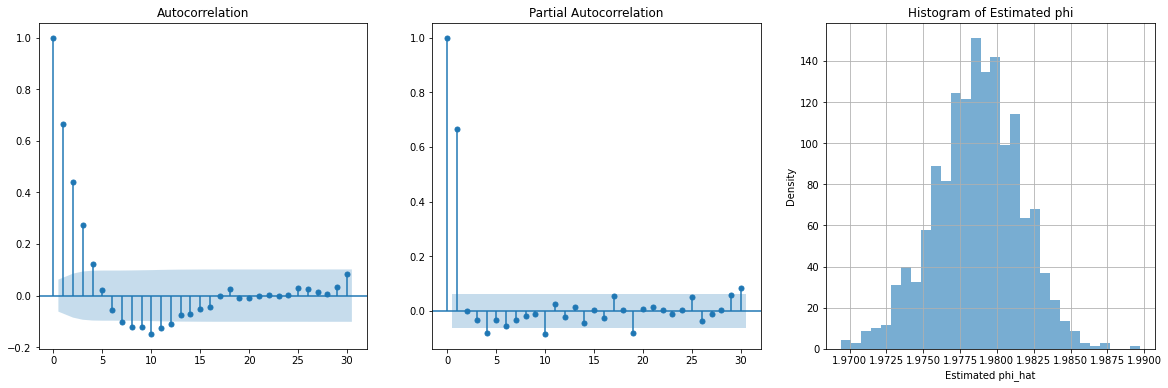

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

_acf = plot_acf(error_list_ar2[0], ax=ax[0])
_pacf = plot_pacf(error_list_ar2[0], ax=ax[1])

ax[2].hist(phi_list_ar2, 
           bins=30, 
           density=True, 
           alpha=0.6)
plt.title('Histogram of Estimated phi')
plt.xlabel('Estimated phi_hat')
plt.ylabel('Density')
plt.grid(True)

**Histogram of estimated $\hat{\phi}$, errors ACF and PACF : AR(3)**


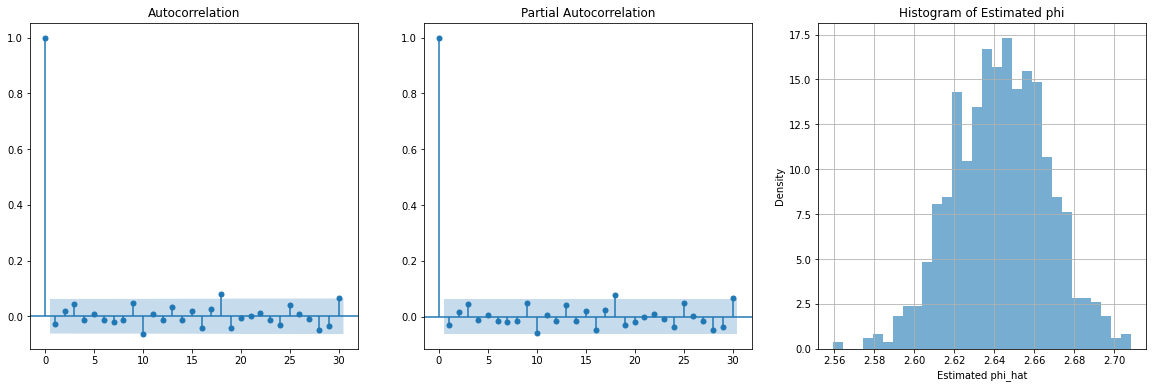

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

_acf = plot_acf(error_list_ar3[0], ax=ax[0])
_pacf = plot_pacf(error_list_ar3[0], ax=ax[1])

ax[2].hist(phi_list_ar3, 
           bins=30, 
           density=True, 
           alpha=0.6)
plt.title('Histogram of Estimated phi')
plt.xlabel('Estimated phi_hat')
plt.ylabel('Density')
plt.grid(True)


**Histogram of estimated $\hat{\phi}$, errors ACF and PACF : AR(4)**


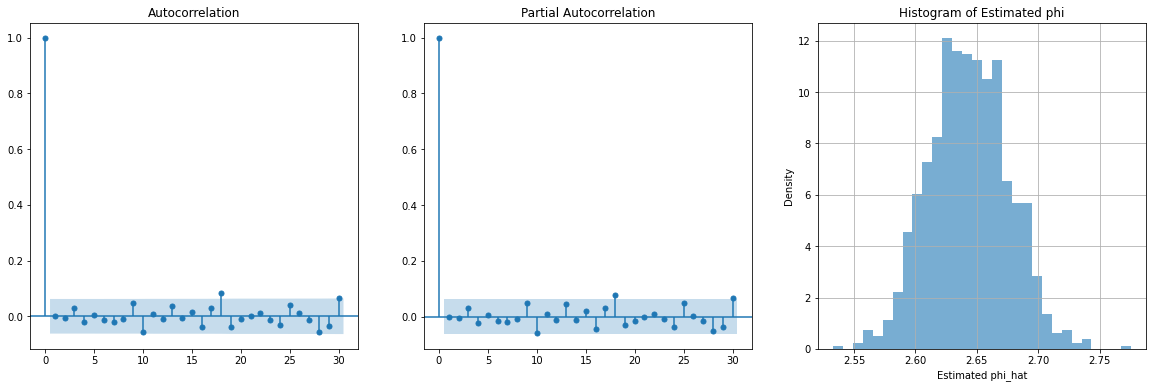

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

_acf = plot_acf(error_list_ar4[0], ax=ax[0])
_pacf = plot_pacf(error_list_ar4[0], ax=ax[1])

ax[2].hist(phi_list_ar4, 
           bins=30, 
           density=True, 
           alpha=0.6)
plt.title('Histogram of Estimated phi')
plt.xlabel('Estimated phi_hat')
plt.ylabel('Density')
plt.grid(True)


**Observations from the residuals**

As the number of lags in our OLS estimate increases, we start getting closer to an accurate expectation value of the $\hat{\phi}$ parameter. For AR(1) and AR(2) error ACF functions, we see strong autocorrelations between the residuals because the actual process is AR(3). Once we reach AR(3) in the model, the autocorrelation in the residuals completely disappears. 

The central learning from this simulation experiment - 

To model any AR process, start with AR(1) and look at the autocorrelation in the residuals. Once a p is found such that autocorrelations in residuals for AR(p) go to zero, we can safely say that the AR process has been modelled correctly. Even if we choose a higher p than the actual, it is fine since OLS will drive the parameter for the (p + 1) th lag to 0.

# Question 6

In [15]:
N = 1000    # number of simulations
y = np.zeros((N, N))
x1_arr = []
for i in range(N):
    e_t = np.random.normal(0, 1, N)
    x_1_i = np.random.normal(0, 1, N)
    x1_arr.append(x_1_i)
    x_2_i = np.random.normal(0, 1, N)
    y[:, i] = x_1_i + x_2_i + e_t # Creating the process 

**Estimating the AR process using OLS regression**

In [16]:
phi_list = []
error_list = []
# Iterating for every simulation
for i in range(1000): 
    # Generating dataframe by adding the normalised random variable
    df = pd.DataFrame(data=[y[i], x1_arr[i]]).T
    df.columns = ["y", "x"]
    
    # Run the OLS using statsmodels
    X = df["x"]
    Y = df["y"]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    
    # Appending to list of parameters for every simulation
    phi_list.append(results.params.iloc[1])
    
    # Predicting and storing the error
    pred = results.predict(X)
    resids = Y - pred
    error_list.append(resids)

/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Histogram of estimated $\hat{\beta}$**


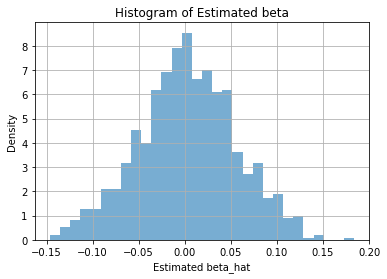

In [17]:
fig = plt.hist(phi_list, 
               bins=30, 
               density=True, 
               alpha=0.6)
plt.title('Histogram of Estimated beta')
plt.xlabel('Estimated beta_hat')
plt.ylabel('Density')
plt.grid(True)

In [18]:
means = [0, 0]
covariance_matrix = [[1, 0.5], [0.5, 1]]
y = np.zeros((N, N))
x1_arr = []
for i in range(N):
    e_t = np.random.normal(0, 1, N)
    x = np.random.multivariate_normal(means, covariance_matrix, N).T
    x1_arr.append(x[0])
    y[:, i] = x[0] + x[1] + e_t # Creating the process 

**Estimating the AR process using OLS regression with $\hat{\rho}$= 0.5**

In [19]:
phi_list = []
error_list = []
# Iterating for every simulation
for i in range(1000): 
    # Generating dataframe by adding the normalised random variable
    df = pd.DataFrame(data=[y[i], x1_arr[i]]).T
    df.columns = ["y", "x"]
    
    # Run the OLS using statsmodels
    X = df["x"]
    Y = df["y"]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    
    # Appending to list of parameters for every simulation
    phi_list.append(results.params.iloc[1])
    
    # Predicting and storing the error
    pred = results.predict(X)
    resids = Y - pred
    error_list.append(resids)

**Histogram of estimated $\hat{\beta}$ with $\hat{\rho}$= 0.5** 

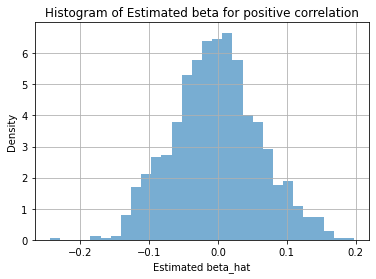

In [20]:
fig = plt.hist(phi_list, 
               bins=30, 
               density=True, 
               alpha=0.6)
plt.title('Histogram of Estimated beta for positive correlation')
plt.xlabel('Estimated beta_hat')
plt.ylabel('Density')
plt.grid(True)

In [21]:
means = [0, 0]
covariance_matrix = [[1, -0.5], [-0.5, 1]]
y = np.zeros((N, N))
x1_arr = []
for i in range(N):
    e_t = np.random.normal(0, 1, N)
    x = np.random.multivariate_normal(means, covariance_matrix, N).T
    x1_arr.append(x[0])
    y[:, i] = x[0] + x[1] + e_t # Creating the process 

In [22]:
phi_list = []
error_list = []
# Iterating for every simulation
for i in range(1000): 
    # Generating dataframe by adding the normalised random variable
    df = pd.DataFrame(data=[y[i], x1_arr[i]]).T
    df.columns = ["y", "x"]
    
    # Run the OLS using statsmodels
    X = df["x"]
    Y = df["y"]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    
    # Appending to list of parameters for every simulation
    phi_list.append(results.params.iloc[1])
    
    # Predicting and storing the error
    pred = results.predict(X)
    resids = Y - pred
    error_list.append(resids)

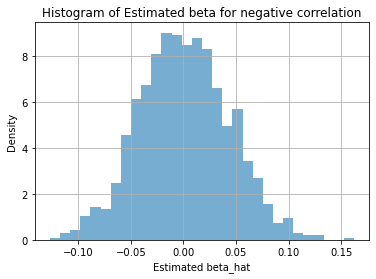

In [23]:
fig = plt.hist(phi_list, 
               bins=30, 
               density=True, 
               alpha=0.6)
plt.title('Histogram of Estimated beta for negative correlation')
plt.xlabel('Estimated beta_hat')
plt.ylabel('Density')
plt.grid(True)

**Description of Results**

# Question 7

In [35]:

import pandas_datareader.data as web
start = '1953-01-01'
end = '2020-02-01'
data = web.DataReader(['DTB3'], 'fred', start, end).resample('M').last().dropna()


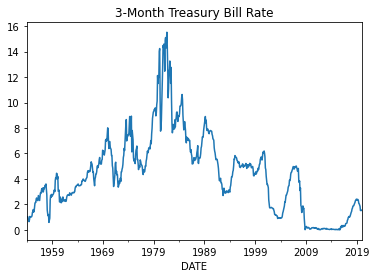

In [36]:

data["DTB3"].plot()
plt.title("3-Month Treasury Bill Rate")
plt.show()

In [37]:
data

,DTB3
DATE,
1954-01-31,1.02
1954-02-28,1.00
1954-03-31,1.03
1954-04-30,0.81
1954-05-31,0.72
...,...
2019-09-30,1.84
2019-10-31,1.51
2019-11-30,1.56


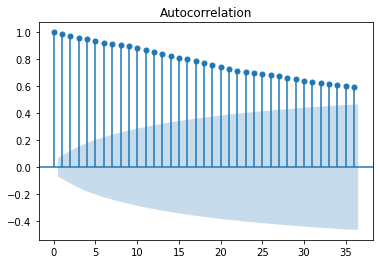

In [38]:
# Use statsmodels to get an ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data["DTB3"], lags=36)
plt.show()


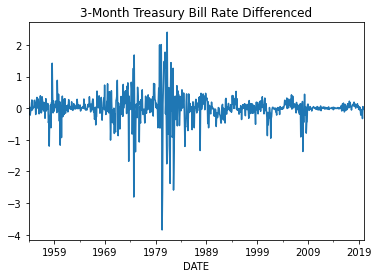

In [39]:
data["DTB3"].diff().plot()
plt.title("3-Month Treasury Bill Rate Differenced")
plt.show()

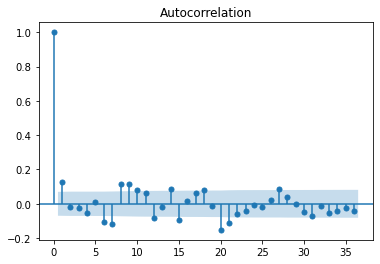

In [40]:
plot_acf(data["DTB3"].diff().dropna(), lags=36)
plt.show()

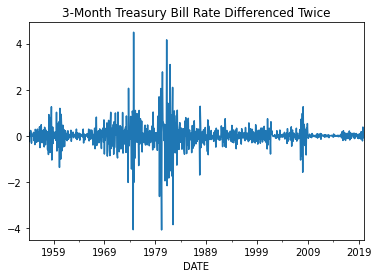

In [41]:
data["DTB3"].diff().diff().dropna().plot()
plt.title("3-Month Treasury Bill Rate Differenced Twice")
plt.show()

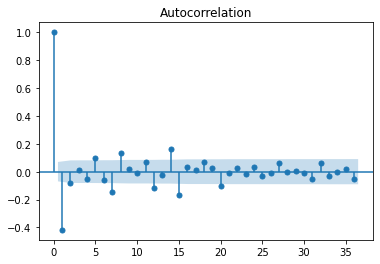

In [42]:
plot_acf(data["DTB3"].diff().diff().dropna(), lags=36)
plt.show()

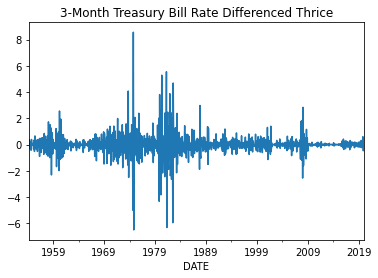

In [43]:
data["DTB3"].diff().diff().diff().dropna().plot()
plt.title("3-Month Treasury Bill Rate Differenced Thrice")
plt.show()

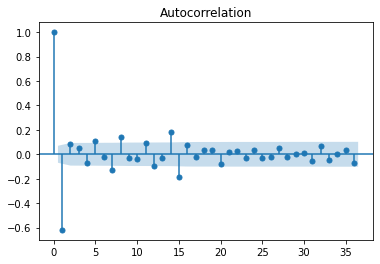

In [44]:
plot_acf(data["DTB3"].diff().diff().diff().dropna(), lags=36)
plt.show()

Differencing the series once is sufficient to remove any unit roots and persistent autocorrelation to change the time series from I(1) to I(0)

In [45]:
from statsmodels.tsa.arima.model import ARIMA
# a function to find the best fitting ARIMA model
def best_fitting_arima_model(y):
    max_ar_order = 4
    max_ma_order = 4
    for ar_order in range(1, max_ar_order + 1):
        for ma_order in range(max_ma_order + 1):
            arima_results = ARIMA(y, order=(ar_order, 1, ma_order))
            arima_results = arima_results.fit()
            print(f"For ARIMA order {arima_results.model_orders} \nAIC: {arima_results.aic} and BIC: {arima_results.bic}")   

best_fitting_arima_model(data["DTB3"])

For ARIMA order {'trend': 0, 'exog': 0, 'ar': 1, 'ma': 0, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 0, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 939.812313772084 and BIC: 949.161436555713
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 1, 'ma': 1, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 1, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 941.0476851363378 and BIC: 955.071369311781
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 1, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 941.8708570743086 and BIC: 960.5691026415662
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 1, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 3, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 943.5197353040195 and BIC: 966.8925422630916
For ARIMA order {'trend': 0, 'exog': 0,

/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


For ARIMA order {'trend': 0, 'exog': 0, 'ar': 3, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 3, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 945.0470754554708 and BIC: 973.0944438063574


/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


For ARIMA order {'trend': 0, 'exog': 0, 'ar': 3, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 3, 'reduced_ma': 3, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 934.4172635352505 and BIC: 967.1391932779516


/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


For ARIMA order {'trend': 0, 'exog': 0, 'ar': 3, 'ma': 4, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 3, 'reduced_ma': 4, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 927.4017294340804 and BIC: 964.7982205685958
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 0, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 0, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 942.9236740550305 and BIC: 966.2964810141026
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 1, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 1, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 943.8710526739135 and BIC: 971.9184210248001
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 945.3613290906752 and BIC: 978.0832588333762


/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 3, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 3, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 932.8384796885562 and BIC: 970.2349708230715
For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 4, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 4, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 923.4928256890518 and BIC: 965.5638782153816


/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
arima_results = ARIMA(data["DTB3"], order=(4, 1, 4)).fit()
print(f"For ARIMA order {arima_results.model_orders} \nAIC: {arima_results.aic} and BIC: {arima_results.bic}")
arima_results.summary()


For ARIMA order {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 4, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 4, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 923.4928256890518 and BIC: 965.5638782153816


/Users/ishan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   DTB3   No. Observations:                  793
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -452.746
Date:                Mon, 08 Apr 2024   AIC                            923.493
Time:                        20:13:03   BIC                            965.564
Sample:                    01-31-1954   HQIC                           939.662
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7083      0.055     12.847      0.000       0.600       0.816
ar.L2         -0.9068      0.078    -11.577      0.000      -1.060      -0.753
ar.L3          0.4867      0.087      5.623      0.000       0.317       0.656
ar.L4         -0.7164      0.061    -11.759      0.000      -0.836      -0.597
ma.L1         -0.5925      0.056    -10.665      0.000      -0.701      -0.484
ma.L2          0.9205      0.071     12.967      0.000       0.781       1.060
ma.L3         -0.4680      0.078     -5.997      0.000      -0.621      -0.315
ma.L4          0.7943      0.056     14.284      0.000       0.685       0.903
sigma2         0.1834      0.003     58.029      0.000       0.177       0.190
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10447.06
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

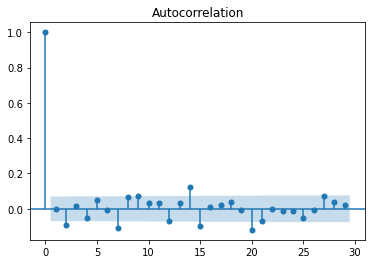

In [47]:
plot_acf(arima_results.resid)
plt.show()

In [48]:
arima_results = ARIMA(data["DTB3"], order=(1, 1, 0)).fit()
print(f"For ARIMA order {arima_results.model_orders} \nAIC: {arima_results.aic} and BIC: {arima_results.bic}")
arima_results.summary()


For ARIMA order {'trend': 0, 'exog': 0, 'ar': 1, 'ma': 0, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 1, 'reduced_ma': 0, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1} 
AIC: 939.812313772084 and BIC: 949.161436555713


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   DTB3   No. Observations:                  793
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -467.906
Date:                Mon, 08 Apr 2024   AIC                            939.812
Time:                        20:13:03   BIC                            949.161
Sample:                    01-31-1954   HQIC                           943.406
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1275      0.013      9.667      0.000       0.102       0.153
sigma2         0.1908      0.003     61.581      0.000       0.185       0.197
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10564.18
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

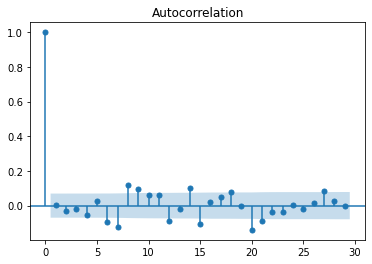

In [49]:
plot_acf(arima_results.resid)
plt.show()

There are oscillations in the ACF and PACF plots, which suggest that the model is not a good fit.
There seems to be some seasonality and serial correlation in the data, which is not captured by the ARMA model.
